<a href="https://colab.research.google.com/github/alicia0928/Resnet50/blob/main/pytorch_project_resnet50_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이미지 데이터 파이토치 커스터마이징하기

In [ ]:
import torch
import torchvision
from torchvision import transforms # 이미지 데이터 transform
from torch.utils.data import DataLoader # 이미지 데이터 로더
import os
import glob

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed_all(777)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 경로 지정
train_path = '/content/drive/MyDrive/파이토치/train'
test_path = '/content/drive/MyDrive/파이토치/test'

Dataset_path = '/content/drive/MyDrive/파이토치'
model_path = '/content/drive/MyDrive/파이토치/model_test'

cactus_dir = '/cactus/'
dracaena_sanderiana_dir = '/dracaena_sanderiana/'
monstera_dir = '/monstera/'
rosemary_dir = '/rosemary/'

# 이미지 데이터 전처리   
> 파이토치 라이브러리를 이용한 쉬운 방법 or albumentation 라이브러리를 이용한 데이터 커스터마이징 2가지 방식으로 진행합니다.

 1. 이미지를 resize합니다.   
    
 2. resize한 이미지에 대해서 스케일링을 준비합니다.   
    
 3. 전처리한 이미지들을 augmentation해줍니다.   
   
 4. augmentation transform을 진행했으면, data loader로 학습을 준비합니다.

## 파이토치 라이브러리를 이용해 쉽게 진행
1. 이미지 resize & 스케일링
> 꼭 resize를 진행한 이미지들을 스케일링 해줍니다.   

In [ ]:
resize_trans = transforms.Compose([
                                   transforms.Resize((128,128)),
                                   transforms.ToTensor()
])

resize_train = torchvision.datasets.ImageFolder(root=train_path, transform=resize_trans)
resize_test = torchvision.datasets.ImageFolder(root=test_path, transform=resize_trans)

In [ ]:
resize_train[0][0].shape # ToTensor를 진행했기 때문에 데이터가 torch(C,H,W) 형태로 바뀜

torch.Size([3, 128, 128])

In [ ]:
resize_train[0][0]

tensor([[[0.8627, 0.8706, 0.8706,  ..., 0.8863, 0.8824, 0.8784],
         [0.8549, 0.8627, 0.8627,  ..., 0.8824, 0.8784, 0.8706],
         [0.8353, 0.8549, 0.8627,  ..., 0.8745, 0.8745, 0.8706],
         ...,
         [0.5804, 0.5804, 0.5686,  ..., 0.6980, 0.6941, 0.6667],
         [0.5294, 0.5490, 0.5529,  ..., 0.7098, 0.6980, 0.6667],
         [0.5020, 0.5137, 0.5451,  ..., 0.7529, 0.7490, 0.7294]],

        [[0.8157, 0.8235, 0.8196,  ..., 0.8510, 0.8510, 0.8431],
         [0.8078, 0.8157, 0.8157,  ..., 0.8471, 0.8471, 0.8431],
         [0.7922, 0.8118, 0.8196,  ..., 0.8392, 0.8431, 0.8431],
         ...,
         [0.4588, 0.4588, 0.4431,  ..., 0.5569, 0.5490, 0.5216],
         [0.4078, 0.4235, 0.4314,  ..., 0.5765, 0.5647, 0.5373],
         [0.3765, 0.3882, 0.4235,  ..., 0.6157, 0.6078, 0.5882]],

        [[0.7294, 0.7373, 0.7373,  ..., 0.7843, 0.7843, 0.7765],
         [0.7216, 0.7333, 0.7373,  ..., 0.7843, 0.7804, 0.7725],
         [0.7098, 0.7333, 0.7412,  ..., 0.7804, 0.7804, 0.

In [ ]:
import numpy as np
np.mean(resize_train[0][0].numpy(),axis=(1,2)) # numpy로 바꾸고, axis = 1,2 mean으로 RGB mean/std 뽑기

array([0.6769048 , 0.63308895, 0.5766504 ], dtype=float32)

In [ ]:
from PIL import Image

def load_image(path):
    try:
        with open(path, "rb") as f:
            img = Image.open(f)
            return img.convert("RGB")
    except OSError as e:
        print(f"OSError: {e}. Deleting this image: {path}")
        os.remove(path)
        return None

def get_mean_std(dataset):
    meanRGB = []
    stdRGB = []

    for path, _ in dataset.samples:
        image = load_image(path)
        if image is None:
            continue
        try:
            image_np = np.array(image)
            meanRGB.append(np.mean(image_np, axis=(0, 1)))
            stdRGB.append(np.std(image_np, axis=(0, 1)))
        except Exception as e:
            print(f"Error processing image: {e}")
            continue

    meanRGB = np.array(meanRGB)
    stdRGB = np.array(stdRGB)

    meanR = np.mean(meanRGB[:, 0])
    meanG = np.mean(meanRGB[:, 1])
    meanB = np.mean(meanRGB[:, 2])

    stdR = np.mean(stdRGB[:, 0])
    stdG = np.mean(stdRGB[:, 1])
    stdB = np.mean(stdRGB[:, 2])

    print("Mean RGB:", meanR, meanG, meanB)
    print("Std RGB:", stdR, stdG, stdB)

In [ ]:
#get_mean_std(resize_train)

KeyboardInterrupt: 

In [ ]:
#get_mean_std(resize_test)

OSError: image file is truncated. Deleting this image: /content/drive/MyDrive/파이토치/test/monstera/monstera268.jpg
Mean RGB: 137.74812157335774 145.3072581581534 119.92553101067405
Std RGB: 61.200436768241694 57.10986877811195 65.14945200830438


In [ ]:
# normalization 준비

resize_train_mean=[0.17191947, 0.41128376, 0.56153077]
resize_train_std=[0.16150557, 0.16577946, 0.16063999]

resize_test_mean=[0.15918699, 0.410329, 0.55247366]
resize_test_std=[0.1542138, 0.16098696, 0.15552239]

3. transform을 이용해 data augmentation하기

In [ ]:
transform_train = transforms.Compose([
    transforms.Resize((128, 128)), # 이미지 resize
    transforms.RandomCrop(124), # 이미지를 랜덤으로 크롭
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2), # 이미지 지터링(밝기, 대조, 채비, 색조)
    transforms.RandomHorizontalFlip(p = 1), # p확률로 이미지 좌우반전
    transforms.RandomVerticalFlip(p = 1), # p확률로 상하반전
    transforms.ToTensor(),
    transforms.Normalize(resize_train_mean, resize_train_std)
])

transform_test = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(resize_test_mean, resize_test_std)
])

trainset = torchvision.datasets.ImageFolder(root=train_path, transform=transform_train)
testset = torchvision.datasets.ImageFolder(root=test_path, transform=transform_test)


augmentation을 적용한 상어 이미지 확인하기

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

def imshow(img, mean, std):
    npimg = img.numpy()
    img = np.transpose( npimg, (1, 2, 0) )
    img = img * std + mean # renormalize
    img = img.clip(0, 1)
    plt.imshow(img)
    plt.show()


none_trans = torchvision.datasets.ImageFolder(root=train_path, transform=None)

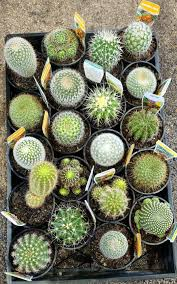

In [ ]:
# 원본 이미지
none_trans[359][0]

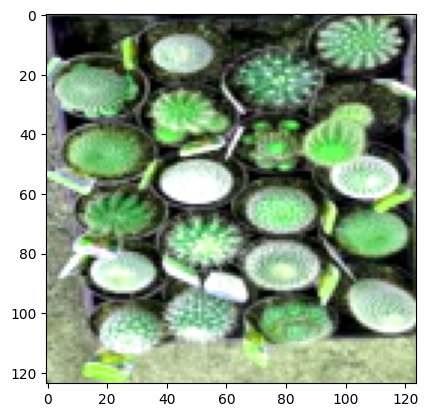

In [ ]:
# augmentation을 적용한 shark 이미지
imshow((trainset[359][0]),resize_train_mean,resize_train_std)

data loader까지 정의했으니 이제 학습을 위한 데이터 준비는 끝났습니다!

In [ ]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=0)

testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=0)

# resnet 50 아키텍쳐 구성

In [ ]:
# import resnet
import torchvision.models.resnet as resnet
import torch.nn as nn
import torch.optim as optim

# 미리 정의
conv1x1=resnet.conv1x1
Bottleneck = resnet.Bottleneck
BasicBlock= resnet.BasicBlock

In [ ]:
class ResNet(nn.Module):

    def __init__(self, block, layers, num_classes=1000, zero_init_residual=True):
        super(ResNet, self).__init__()
        self.inplanes = 32 # conv1에서 나올 채널의 차원 -> 이미지넷보다 작은 데이터이므로 32로 조정

        # inputs = 3x224x224 -> 3x128x128로 바뀜
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1, bias=False) # 마찬가지로 전부 사이즈 조정
        self.bn1 = nn.BatchNorm2d(32)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        self.layer1 = self._make_layer(block, 32, layers[0], stride=1) # 3 반복
        self.layer2 = self._make_layer(block, 64, layers[1], stride=2) # 4 반복
        self.layer3 = self._make_layer(block, 128, layers[2], stride=2) # 6 반복
        self.layer4 = self._make_layer(block, 256, layers[3], stride=2) # 3 반복

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(256 * block.expansion, num_classes)

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

        # Zero-initialize the last BN in each residual branch,
        # so that the residual branch starts with zeros, and each residual block behaves like an identity.
        # This improves the model by 0.2~0.3% according to https://arxiv.org/abs/1706.02677
        if zero_init_residual:
            for m in self.modules():
                if isinstance(m, Bottleneck):
                    nn.init.constant_(m.bn3.weight, 0)
                elif isinstance(m, BasicBlock):
                    nn.init.constant_(m.bn2.weight, 0)

    def _make_layer(self, block, planes, blocks, stride=1): # planes -> 입력되는 채널 수
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                conv1x1(self.inplanes, planes * block.expansion, stride),
                nn.BatchNorm2d(planes * block.expansion),
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes * block.expansion
        for _ in range(1, blocks):
            layers.append(block(self.inplanes, planes))

        return nn.Sequential(*layers)

    def forward(self, x):
        # input [32, 128, 128] -> [C ,H, W]
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        #x.shape =[32, 64, 64]

        x = self.layer1(x)
        #x.shape =[128, 64, 64]
        x = self.layer2(x)
        #x.shape =[256, 32, 32]
        x = self.layer3(x)
        #x.shape =[512, 16, 16]
        x = self.layer4(x)
        #x.shape =[1024, 8, 8]

        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)

        return x

In [ ]:
resnet50 = ResNet(resnet.Bottleneck, [3, 4, 6, 3], num_classes=4, zero_init_residual=True).to(device)
# resnet50
# 1(conv1) + 9(layer1) + 12(layer2) + 18(layer3) + 9(layer4) +1(fc)= ResNet50

## 구성한 아키텍쳐 확인하기

In [ ]:
# 출력 tensor가 맞는지 확인해보자

from torchsummary import summary
summary(resnet50, input_size=(3, 128, 128), device=device)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 128, 128]             864
       BatchNorm2d-2         [-1, 32, 128, 128]              64
              ReLU-3         [-1, 32, 128, 128]               0
         MaxPool2d-4           [-1, 32, 64, 64]               0
            Conv2d-5           [-1, 32, 64, 64]           1,024
       BatchNorm2d-6           [-1, 32, 64, 64]              64
              ReLU-7           [-1, 32, 64, 64]               0
            Conv2d-8           [-1, 32, 64, 64]           9,216
       BatchNorm2d-9           [-1, 32, 64, 64]              64
             ReLU-10           [-1, 32, 64, 64]               0
           Conv2d-11          [-1, 128, 64, 64]           4,096
      BatchNorm2d-12          [-1, 128, 64, 64]             256
           Conv2d-13          [-1, 128, 64, 64]           4,096
      BatchNorm2d-14          [-1, 128,

In [ ]:
from torchvision import models
import torch

resnet50_pretrained = models.resnet50(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 133MB/s]


In [ ]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

torch.Size([32, 3, 3, 3])


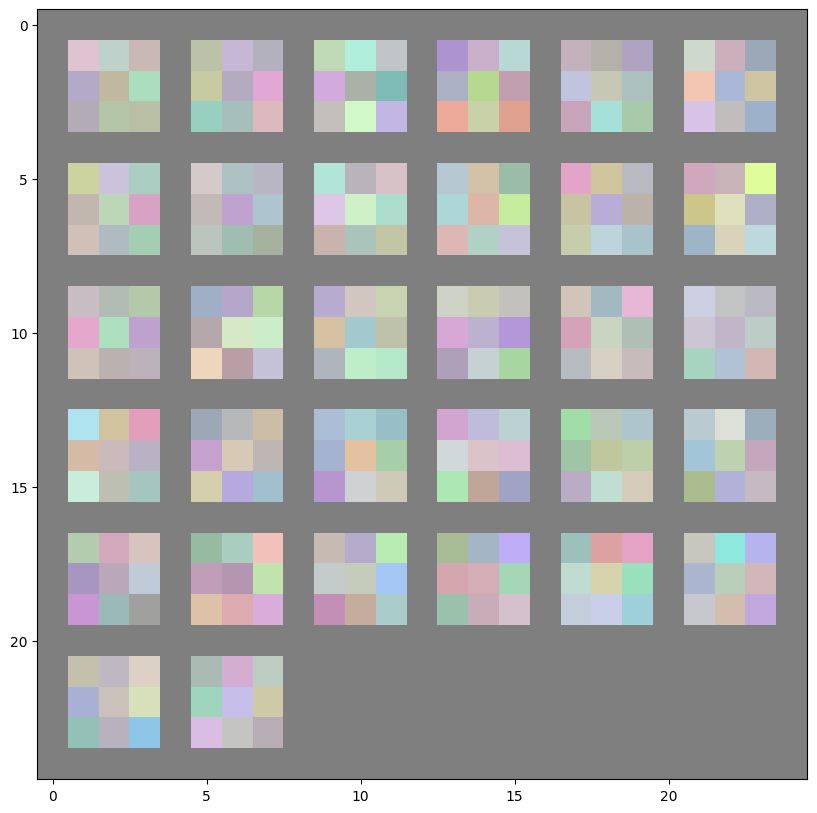

In [ ]:
# 첫 번째 layer의 filter를 확인해보자 (=가중치 확인) -> 나중에 학습을 완료한 후의 filter도 확인하기
for w in resnet50.parameters():
    w = w.data.cpu()
    print(w.shape)
    break

# 가중치 renormalization
min_w = torch.min(w)
w1 = (-1/(2 * min_w)) * w + 0.5

# make grid to display it
grid_size = len(w1)
x_grid = [w1[i] for i in range(grid_size)]
x_grid = torchvision.utils.make_grid(x_grid, nrow=6, padding=1)

plt.figure(figsize=(10, 10))
imshow(x_grid)

## 파라미터 설정하기

In [ ]:
# config 모델 파라미터 인자를 만들기위한 클래스
class Config:
  def __init__(self, **kwargs):
    for key, value in kwargs.items():
      setattr(self, key, value)

In [ ]:
lr = 0.0008
epochs = 30
optimizer = 'Adam'

In [ ]:
# 파라미터 클래스
config = Config(
    trainloader = trainloader,
    testloader = testloader,
    model = resnet50,
    device = device,
    optimizer = torch.optim.Adam(resnet50.parameters(), lr=lr),
    criterion= nn.CrossEntropyLoss().to(device),
    globaliter = 0
)

In [ ]:
        # 모델 저장 함수 정의
def save_model(model, saved_dir):
  os.makedirs(saved_dir, exist_ok=True)  # 폴더가 존재하지 않으면, 디렉토리를 생성함.
  check_point = {
  'net': model.state_dict()
  #'optim' : optimizer.state_dict()
  #'loss' : loss.state_dict()
  #'epoch' : epoch.state_dict()
  }
  #output_path = os.path.join(saved_dir) # 옵션들을 합쳐 경로 지정
  torch.save(check_point, saved_dir+'/best_model_weight.pt') # 인수로 '모델의 매개 변수, 경로'를 넣어주면 된다.

# def save_model(model, saved_dir):
#   os.makedirs(saved_dir, exist_ok=True)  # 폴더가 존재하지 않으면, 디렉토리를 생성함.
#   torch.save(model, saved_dir+'/best_model.pth') # 인수로 '모델의 매개 변수, 경로'를 넣어주면 된다.

# model_h5_path = os.path.join(Dataset_path, model_path)
# model_h5_file = os.path.join(model_h5_path, 'model.pth')
# os.makedirs(model_h5_path, exist_ok=True)

In [ ]:
# class train_test():
#       def __init__(self, config):
#         # 파라미터 인자
#         self.trainloader = config.trainloader
#         self.testloader = config.testloader
#         self.model = config.model
#         self.device = config.device
#         self.optimizer = config.optimizer
#         self.criterion = config.criterion
#         self.globaliter = config.globaliter
#         print(len(trainloader))
#       def train(self, epochs, log_interval):
#           self.model.train()
#           for epoch in range(1, epochs + 1 ):  # epochs 루프
#               running_loss = 0.0
#               lr_sche.step()
#               for i, data in enumerate(self.trainloader, 0): # batch 루프
#                   # get the inputs
#                   self.globaliter += 1
#                   inputs, labels = data # input data, label 분리
#                   inputs = inputs.to(self.device)
#                   labels = labels.to(self.device)

#                   # 가중치 초기화 -> 이전 batch에서 계산되었던 가중치를 0으로 만들고 최적화 진행
#                   self.optimizer.zero_grad()

#                   # forward + backward + optimize
#                   outputs = self.model(inputs)
#                   loss = self.criterion(outputs, labels)
#                   loss.backward()
#                   self.optimizer.step()
#                   running_loss += loss.item()

#                   # 30 iteration마다 acc & loss 출력
#                   if i % log_interval == log_interval -1 : # i는 1에포크의 iteration
#                     print('Train Epoch: {} [{}/{} ({:.0f}%)]\tlearningLoss: {:.6f}\twhole_loss: {:.6f} '.format(
#                         epoch, i*len(inputs), len(self.trainloader.dataset),
#                         100. * i*len(inputs) / len(self.trainloader.dataset),
#                         running_loss / log_interval,
#                         loss.item()))
#                     running_loss = 0.0
#               avg_train_loss = running_loss / len(self.trainloader)

#                     # with train_summary_writer.as_default():
#                     #    summary.scalar('loss', loss.item() , step = self.globaliter)

#               with torch.no_grad():
#                   self.model.eval()
#                   correct = 0
#                   total = 0
#                   test_loss = 0
#                   acc = []
#                   for k, data in enumerate(self.testloader, 0):
#                     images, labels = data
#                     images = images.to(self.device)
#                     labels = labels.to(self.device)
#                     outputs = self.model(images)

#                     _, predicted = torch.max(outputs.data, 1)
#                     total += labels.size(0)
#                     correct += (predicted == labels).sum().item()
#                     test_loss += self.criterion(outputs, labels).item()
#                     acc.append(100 * correct/total)

#                   avg_test_loss = test_loss / len(self.testloader)
#                   print('\nTest set : Average loss:{:.4f}, Accuracy: {}/{}({:.0f}%)\n'.format(
#                       test_loss, correct, total, 100 * correct/total
#                   ))
#                   if acc[k] > 80:
#                     save_model( self.model, Dataset_path)
#                     print('Succeed save the model')

#                   # with test_summary_writer.as_default():  # 텐서보드에 등록하기
#                   #     summary.scalar('loss', test_loss , step = self.globaliter)
#                   #     summary.scalar('accuracy', 100 * correct/total , step = self.globaliter)
#                   #     if acc[k] > 80:
#                   #        save_model( self.model, Dataset_path)
#                   #        print('Succeed save the model')

#       print('Finished Training')

Finished Training


In [ ]:
class train_test():
    def __init__(self, config):
        self.trainloader = config.trainloader
        self.testloader = config.testloader
        self.model = config.model
        self.device = config.device
        self.optimizer = config.optimizer
        self.criterion = config.criterion
        self.globaliter = config.globaliter
        print(len(self.trainloader))

    def train(self, epoch, log_interval):
        self.model.train()
        running_loss = 0.0
        total_train_loss = 0.0  # 누적 훈련 손실 초기화
        for i, data in enumerate(self.trainloader, 0):
            self.globaliter += 1
            inputs, labels = data
            inputs = inputs.to(self.device)
            labels = labels.to(self.device)

            self.optimizer.zero_grad()
            outputs = self.model(inputs)
            loss = self.criterion(outputs, labels)
            loss.backward()
            self.optimizer.step()
            running_loss += loss.item()
            total_train_loss += loss.item()  # 누적 훈련 손실

            if i % log_interval == log_interval - 1:
                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tlearningLoss: {:.6f}\twhole_loss: {:.6f}'.format(
                    epoch, i * len(inputs), len(self.trainloader.dataset),
                    100. * i * len(inputs) / len(self.trainloader.dataset),
                    running_loss / log_interval,
                    loss.item()))
                running_loss = 0.0

        avg_train_loss = total_train_loss / len(self.trainloader)  # 평균 훈련 손실 계산

        with torch.no_grad():
            self.model.eval()
            correct = 0
            total = 0
            total_test_loss = 0.0  # 누적 테스트 손실 초기화
            for k, data in enumerate(self.testloader, 0):
                images, labels = data
                images = images.to(self.device)
                labels = labels.to(self.device)
                outputs = self.model(images)

                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                total_test_loss += self.criterion(outputs, labels).item()  # 누적 테스트 손실

            avg_test_loss = total_test_loss / len(self.testloader)  # 평균 테스트 손실 계산
            accuracy = 100. * correct / total

            print('\nTest set : Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
                avg_test_loss, correct, total, accuracy
            ))

            if accuracy > 80:
                save_model(self.model, Dataset_path)
                print('Succeed save the model')

        return avg_train_loss, avg_test_loss  # 에포크 종료 후 평균 손실 반환

    print('Finished Training')

Finished Training


In [ ]:
ready_to_train=train_test(config)

36


Train Epoch: 0 [576/2270 (25%)]	learningLoss: 1.282764	whole_loss: 1.294585
Train Epoch: 0 [1216/2270 (54%)]	learningLoss: 1.225965	whole_loss: 1.202548
Train Epoch: 0 [1856/2270 (82%)]	learningLoss: 1.127866	whole_loss: 1.108266

Test set : Average loss: 1.1322, Accuracy: 461/871 (53%)

Train Epoch: 1 [576/2270 (25%)]	learningLoss: 1.152187	whole_loss: 1.212150
Train Epoch: 1 [1216/2270 (54%)]	learningLoss: 1.075692	whole_loss: 1.094130
Train Epoch: 1 [1856/2270 (82%)]	learningLoss: 1.069746	whole_loss: 1.134071

Test set : Average loss: 1.3381, Accuracy: 453/871 (52%)

Train Epoch: 2 [576/2270 (25%)]	learningLoss: 1.079024	whole_loss: 0.959500
Train Epoch: 2 [1216/2270 (54%)]	learningLoss: 1.035720	whole_loss: 1.249452
Train Epoch: 2 [1856/2270 (82%)]	learningLoss: 0.976000	whole_loss: 0.912504

Test set : Average loss: 0.9373, Accuracy: 531/871 (61%)

Train Epoch: 3 [576/2270 (25%)]	learningLoss: 0.977001	whole_loss: 1.062181
Train Epoch: 3 [1216/2270 (54%)]	learningLoss: 0.944097	w

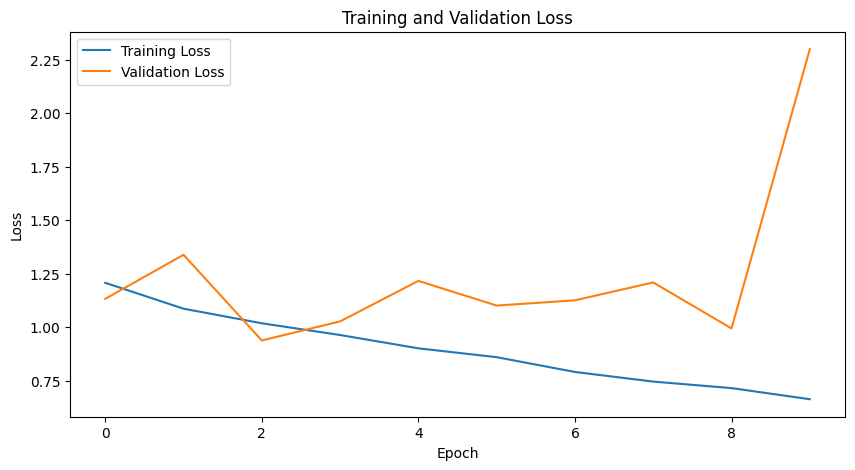

In [ ]:
lr_sche = optim.lr_scheduler.StepLR(config.optimizer, step_size=10000, gamma=0.5) # 20 step마다 lr조정
# epochs = 200
# log_interval = 175

# ready_to_train.train(epochs, log_interval)

epochs = 10
log_interval = 10
train_losses = []
val_losses = []

#ready_to_train.train(epochs, log_interval)
for epoch in range(epochs):
    train_loss, val_loss = ready_to_train.train(epoch, log_interval)
    train_losses.append(train_loss)
    val_losses.append(val_loss)

# 손실 그래프를 그립니다
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()